In [1]:
from __future__ import division
import imp
import uproot
import matplotlib
#matplotlib.use('agg')
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import pandas as pd
import os
import ROOT
import time
import math
from array import array
import collections

inputdir = '/home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/'
outputdir = '/home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/'+'xsec_MCC8_to_9/' 
output_filedir = outputdir
input_filedir = '/home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/'
lib_function_dir = '/home/tmettler/Desktop/uBoone/do_plots/'

plot_systematic = 0

# helper functions
globale = imp.load_source('globale',lib_function_dir+'globale.py')
NuCC = imp.load_source('NuCC_function',lib_function_dir+'NuCC_function.py')
NuCC_w = imp.load_source('NuCCWeight_function',lib_function_dir+'NuCCWeight_function.py')
FF = imp.load_source('FF_functions',lib_function_dir+'FF_functions.py')

Welcome to JupyROOT 6.18/04
N_tot =  4.10331109202e+31   flux=  1.58051463543e+11 for pot:  2.144e+20


In [2]:
#!jupyter nbconvert --to script numuCCana_xsec_crosscheck.ipynb

In [3]:
outputdir_png, outputdir_root,outputdir_pdf = NuCC.prepareOutput2(outputdir)
try:
    os.stat(output_filedir)
except:
    os.mkdir(output_filedir)
RootFile = ROOT.TFile(output_filedir+"MCC8_to_9.root","RECREATE");

In [4]:
# initialte ROOT default canvas
#ROOT.gROOT.SetBatch(ROOT.kFALSE)
ROOT.gStyle.SetOptStat(0)
ROOT.gStyle.SetOptTitle(0)
c1 = ROOT.TCanvas("c1","c1",1600,1200)
c1.SetGrid(1)
c1.SetLeftMargin(0.14)
c1.SetRightMargin(0.1)
c1.SetBottomMargin(0.14)

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


# CRTinBNB tagger, Overlay or MC

In [5]:
# Load input files
#inputdir = '/home/thomasm/numuCC/V33/10kevents/'
outputdir_png, outputdir_root, outputdir_pdf = NuCC.prepareOutput2(outputdir)

#filename_overlay = 'NuCCana_overlay_V26_mar18.root'
#filename_data = 'NuCCana_data_fullRun3.root'
#filename_ext = 'NuCCana_ext_V25_G1.root'
#filename_dirt = 'NuCCana_dirt_V26_weight.root'
    
#tree_name = 'numuCCAna'

In [6]:
#Open all the trees of the four files (data, ext, dirt, overlay)
'''
data, ext, dirt, overlay = NuCC.openTrees(inputdir, filename_data, filename_ext, filename_dirt, filename_overlay, tree_name)
NuCC.printNumberOfEntries(data,ext,dirt,overlay)

pot_overlay = NuCC.getPOT(inputdir,filename_overlay,tree_name)
pot_dirt =  NuCC.getPOT(inputdir,filename_dirt,tree_name)
#V25 files
#pot_data =    9.457e+18  # best with tor875
#data_trigger = 2278230.0 #2220362.0 #1854495.0 #4743794 # 1987072.0 # E1DCNT_wcut
ext_trigger =  85768579.0  #2120135 #5685315 # EXT

pot_data =     2.144e+20  # best with tor875
data_trigger = 51546294.0 #1854495.0 #4743794 # 1987072.0 # E1DCNT_wcut

pot_overlay = 1.32634824337e+21 #NuCC.getPOT(inputdir,filename_overlay,tree_name)
pot_dirt =  1.25019694173e+20 # NuCC.getPOT(inputdir,filename_dirt,tree_name)
#V25 files
pot_data =    7.644e+18  # best with tor875
data_trigger = 1838700.0 #2220362.0 #1854495.0 #4743794 # 1987072.0 # E1DCNT_wcut
ext_trigger =  18997529.0  #2120135 #5685315 # EXT

print 'POT: '
print 'Data:\t\t', pot_data
print 'Ext:\t\t', 0
print 'Overlay:\t', pot_overlay
print 'Dirt:\t\t', pot_dirt
print ''
sample = [data,ext,overlay,dirt]
scale = {data:1.0,ext:1.0,overlay:1.0,dirt:1.0}
name = {data:'data',ext:'ext',overlay:'overlay',dirt:'dirt'}

scale[data], scale[ext], scale[dirt], scale[overlay] = NuCC.calculateScale(data_trigger, ext_trigger, pot_data, pot_dirt, pot_overlay)

scale[dirt] = scale[dirt]
scale[overlay] = scale[overlay]
print 'Scalefactors: '
print 'Data:\t\t', scale[data]
print 'Ext:\t\t', scale[ext]
print 'Overlay:\t', scale[overlay]
print 'Dirt:\t\t', scale[dirt]
'''

"\ndata, ext, dirt, overlay = NuCC.openTrees(inputdir, filename_data, filename_ext, filename_dirt, filename_overlay, tree_name)\nNuCC.printNumberOfEntries(data,ext,dirt,overlay)\n\npot_overlay = NuCC.getPOT(inputdir,filename_overlay,tree_name)\npot_dirt =  NuCC.getPOT(inputdir,filename_dirt,tree_name)\n#V25 files\n#pot_data =    9.457e+18  # best with tor875\n#data_trigger = 2278230.0 #2220362.0 #1854495.0 #4743794 # 1987072.0 # E1DCNT_wcut\next_trigger =  85768579.0  #2120135 #5685315 # EXT\n\npot_data =     2.144e+20  # best with tor875\ndata_trigger = 51546294.0 #1854495.0 #4743794 # 1987072.0 # E1DCNT_wcut\n\npot_overlay = 1.32634824337e+21 #NuCC.getPOT(inputdir,filename_overlay,tree_name)\npot_dirt =  1.25019694173e+20 # NuCC.getPOT(inputdir,filename_dirt,tree_name)\n#V25 files\npot_data =    7.644e+18  # best with tor875\ndata_trigger = 1838700.0 #2220362.0 #1854495.0 #4743794 # 1987072.0 # E1DCNT_wcut\next_trigger =  18997529.0  #2120135 #5685315 # EXT\n\nprint 'POT: '\nprint 'D

In [7]:
if 0:
    #filename_overlay = filename_overlay+'out4_noflux.root'
    filename_overlay = 'NuCCana_overlay_V26_sep26.rootout5'+'.rootfriend.root'
    filename_data = filename_data+'out4.root'
    filename_ext = filename_ext+'out4.root'
    filename_dirt = filename_dirt+'out4.root'

    tree_name = 't_out'

    data_out, ext_out, dirt_out, overlay_out = NuCC.openTreesOut(inputdir, filename_data, filename_ext, filename_dirt, filename_overlay, tree_name)
    NuCC.printNumberOfEntries(data_out,ext_out,dirt_out,overlay_out)

    sample_out = [data_out,ext_out,overlay_out,dirt_out]
    scale_out = {data_out:1.0,ext_out:1.0,overlay_out:1.0,dirt_out:1.0}
    name_out = {data_out:'data',ext_out:'ext',overlay_out:'overlay',dirt_out:'dirt'}

    scale_out[data_out], scale_out[ext_out], scale_out[dirt_out], scale_out[overlay_out] = NuCC.calculateScale(data_trigger, ext_trigger, pot_data, pot_dirt, pot_overlay)
    scale_out[dirt_out] = scale_out[dirt_out]
    scale_out[overlay_out] = scale_out[overlay_out]

In [8]:
def my_chi2(h_data1, h_data2, h_covar):
    data1_vec = FF.plot2arr(h_data1,1)
    data2_vec = FF.plot2arr(h_data2,1)
    covar = FF.plot2arr(h_covar,2)    
    inv_covar = np.linalg.inv(covar)
    chi_vec = 0
    for i in range(42):
        for j in range(42):
            chi2_tmp = (data1_vec[i]-data2_vec[i])*inv_covar[i][j]*(data1_vec[j]-data2_vec[j])
            chi_vec +=chi2_tmp
    return chi_vec


In [9]:
def chi2_minus1(h_data1, h_data2, h_covar):
    data_vec = FF.plot2arr(h_data1,1)
    pred_vec = FF.plot2arr(h_data2,1)
    covar_h = FF.plot2arr(h_covar,2)
    
    covar = np.zeros((42,41,41))
    dat_pred = np.zeros((42,41))
    for z in range(42):
        i_c = 0
        for i in range(42):
            j_c = 0
            if i != z :
                dat_pred[z][i_c] = data_vec[i]-pred_vec[i]
                for j in range(42):
                    if j!=z:
                        #print i_c,j_c
                        covar[z][i_c][j_c] = covar_h[i][j]
                        j_c+=1
                i_c+=1
    #inv_covar = np.linalg.inv(covar)
    chi_vec = np.zeros((42))
    for z in range(42):
        inv_covar = np.linalg.inv(covar[z])
        chi_vec[z] = (dat_pred[z]).dot(inv_covar.dot(dat_pred[z]))

    return chi_vec

In [10]:
f_mcc8 = ROOT.TFile.Open('/home/tmettler/Share/'+'microboone_numu_cc_inclusive.root', 'read')

h_data_mcc8 = f_mcc8.Get('xsec_data')
h_smearing_mcc8 = f_mcc8.Get('smearing_matrix')
h_covariance_mcc8 = f_mcc8.Get('covariance_matrix')

#f_mcc9 = ROOT.TFile.Open('/home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_filesV4/'\
#                         +'xsec_2D_Run3_wighted.root', 'read')

f_mcc9 = ROOT.TFile.Open('/home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_filesV4/'\
                         +'xsec_2D_Run3_wighted_MCC8_.root', 'read')

h_data_mcc9 = f_mcc9.Get('xsec_data')

n_bins = h_data_mcc8.GetNbinsX()

h_corr = h_covariance_mcc8.Clone()
for i in range(n_bins):
    for j in range(n_bins):
        #print h_covariance_mcc8.GetBinContent(i+1,i+1),h_data_mcc9.GetBinError(i+1)
        h_corr.SetBinContent(i+1,j+1, h_covariance_mcc8.GetBinContent(i+1,j+1)/math.sqrt(h_covariance_mcc8.GetBinContent(i+1,i+1)*h_covariance_mcc8.GetBinContent(j+1,j+1)))


In [11]:
h_covariance_tot = h_covariance_mcc8.Clone()
for i in range(n_bins):
    #print h_covariance_mcc8.GetBinContent(i+1,i+1),h_data_mcc9.GetBinError(i+1)
    h_covariance_tot.SetBinContent(i+1,i+1, h_covariance_mcc8.GetBinContent(i+1,i+1)+math.pow(h_data_mcc9.GetBinError(i+1),2))

Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_MCC8_to_9/png/smearing_matrix_MCC8.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_MCC8_to_9/root/smearing_matrix_MCC8.root has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_MCC8_to_9/pdf/smearing_matrix_MCC8.pdf has been created
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_MCC8_to_9/png/correlation_matrix_MCC8.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_MCC8_to_9/root/correlation_matrix_MCC8.root has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_MCC8_to_9/pdf/correlation_matrix_MCC8.pdf has been created
Info 

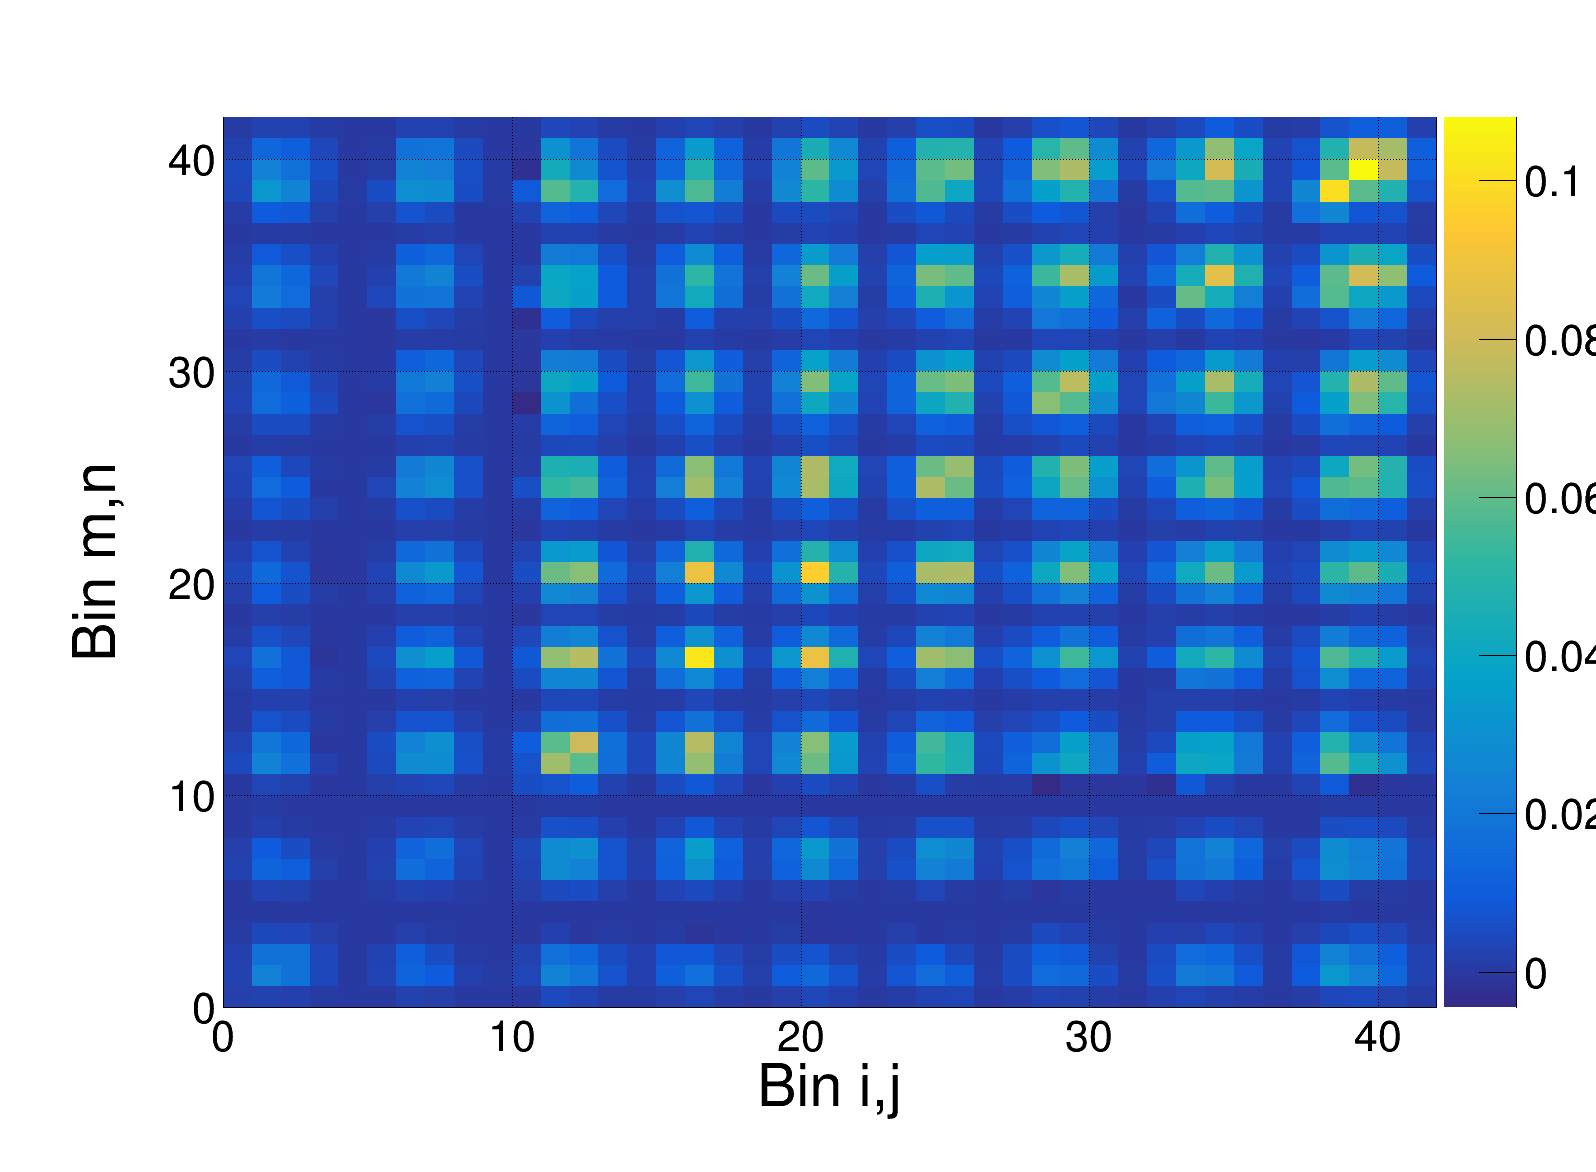

In [12]:
h_smearing_mcc8.Draw('colz')
c1.Draw()
c1.SaveAs(outputdir_png + "smearing_matrix_MCC8.png")
c1.SaveAs(outputdir_root + "smearing_matrix_MCC8.root")
c1.SaveAs(outputdir_pdf + "smearing_matrix_MCC8.pdf")

h_corr.Draw('colz')
c1.Draw()
c1.SaveAs(outputdir_png + "correlation_matrix_MCC8.png")
c1.SaveAs(outputdir_root + "correlation_matrix_MCC8.root")
c1.SaveAs(outputdir_pdf + "correlation_matrix_MCC8.pdf")

h_covariance_mcc8.Draw('colz')
c1.Draw()
c1.SaveAs(outputdir_png + "covariance_matrix_MCC8.png")
c1.SaveAs(outputdir_root + "covariance_matrix_MCC8.root")
c1.SaveAs(outputdir_pdf + "covariance_matrix_MCC8.pdf")

135.30225750236977


Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_MCC8_to_9/png/h_chiM1.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_MCC8_to_9/root/h_chiM1.root has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_MCC8_to_9/pdf/h_chiM1.pdf has been created


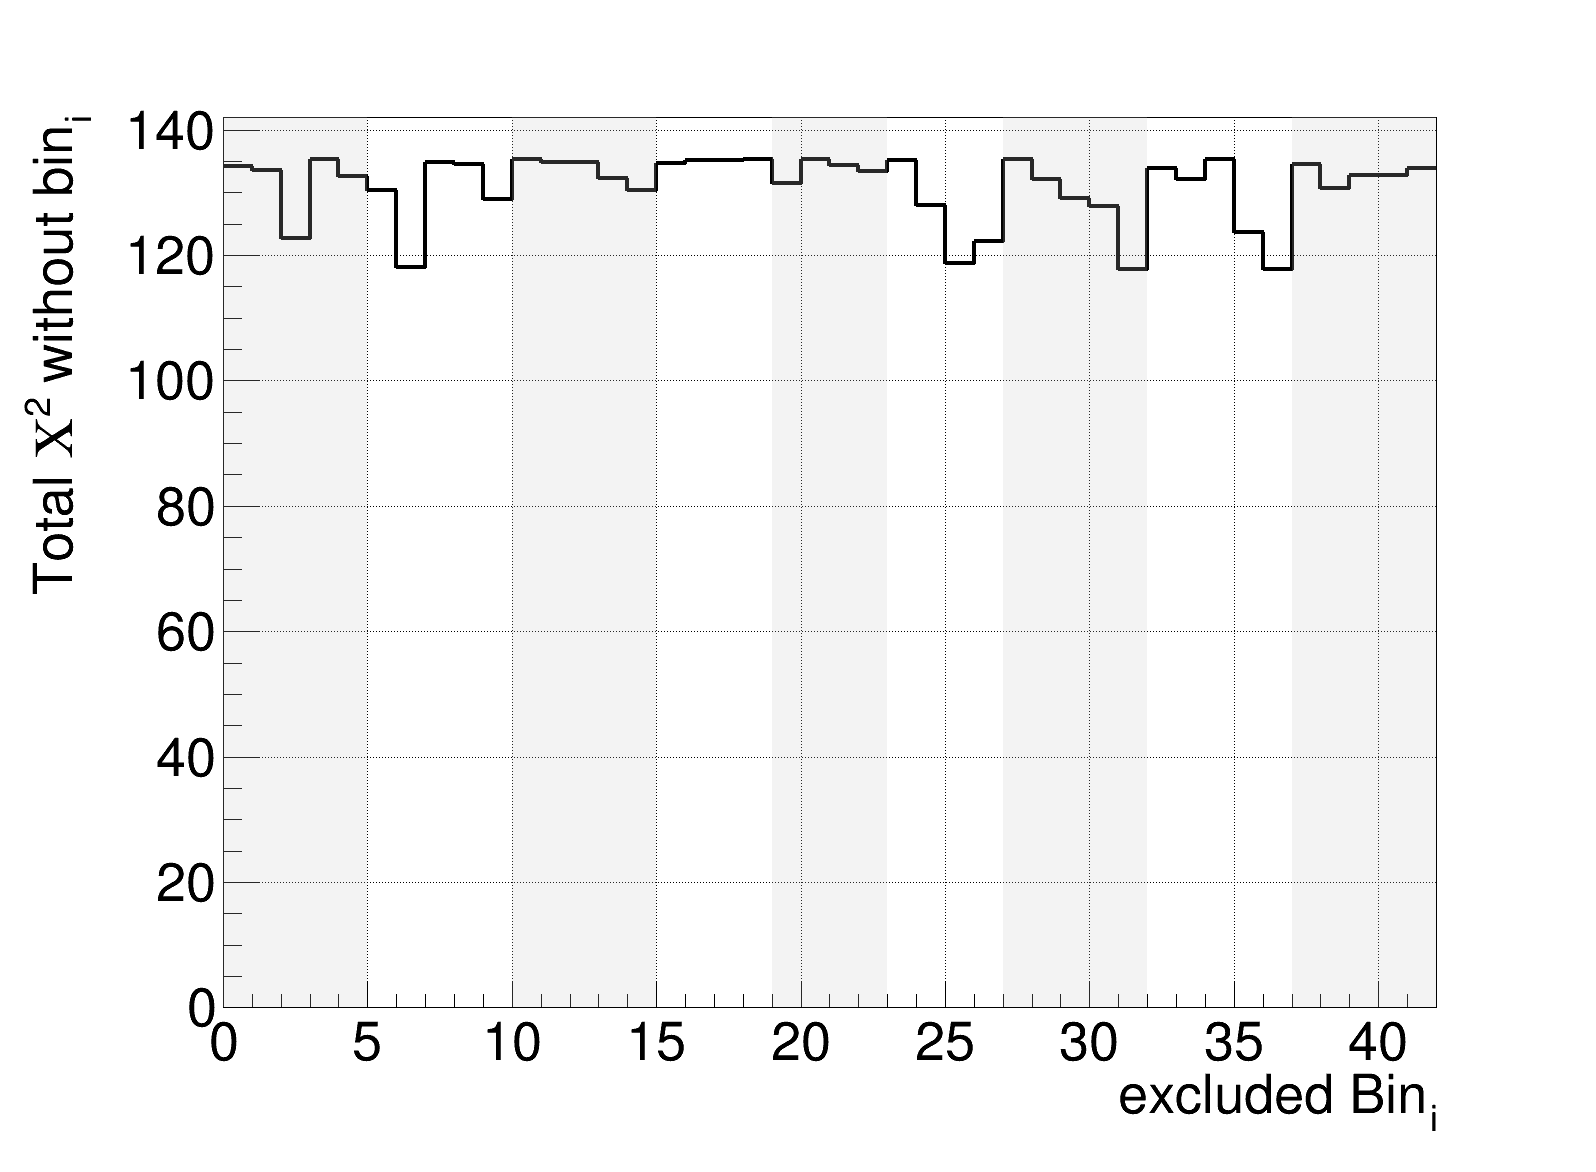

In [13]:
chi2 = my_chi2(h_data_mcc8,h_data_mcc9,h_covariance_tot)
chi2_nMinus1 = chi2_minus1(h_data_mcc8,h_data_mcc9,h_covariance_tot)

print chi2
#print chi2_nMinus1

h_chiM1 = FF.arr2plot(chi2_nMinus1)
h_chiM1.SetMinimum(0)
h_chiM1.SetYTitle('Total #Chi^{2} without bin_{i}')
h_chiM1.GetYaxis().SetTitleOffset(1.3)
h_chiM1.SetXTitle('excluded Bin_{i}')
h_chiM1.Draw()
h_ = FF.histBkg(h_chiM1)
h_.Draw('same')
c1.Draw()
c1.SaveAs(outputdir_png + "h_chiM1.png")
c1.SaveAs(outputdir_root + "h_chiM1.root")
c1.SaveAs(outputdir_pdf + "h_chiM1.pdf")

In [14]:
h_err_mcc8 = h_data_mcc8.Clone()
for i in range(n_bins):
    h_err_mcc8.SetBinError(i+1, math.sqrt(h_covariance_mcc8.GetBinContent(i+1,i+1)))

Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_MCC8_to_9/png/h_MCC8_9.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_MCC8_to_9/root/h_MCC8_9.root has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_MCC8_to_9/pdf/h_MCC8_9.pdf has been created


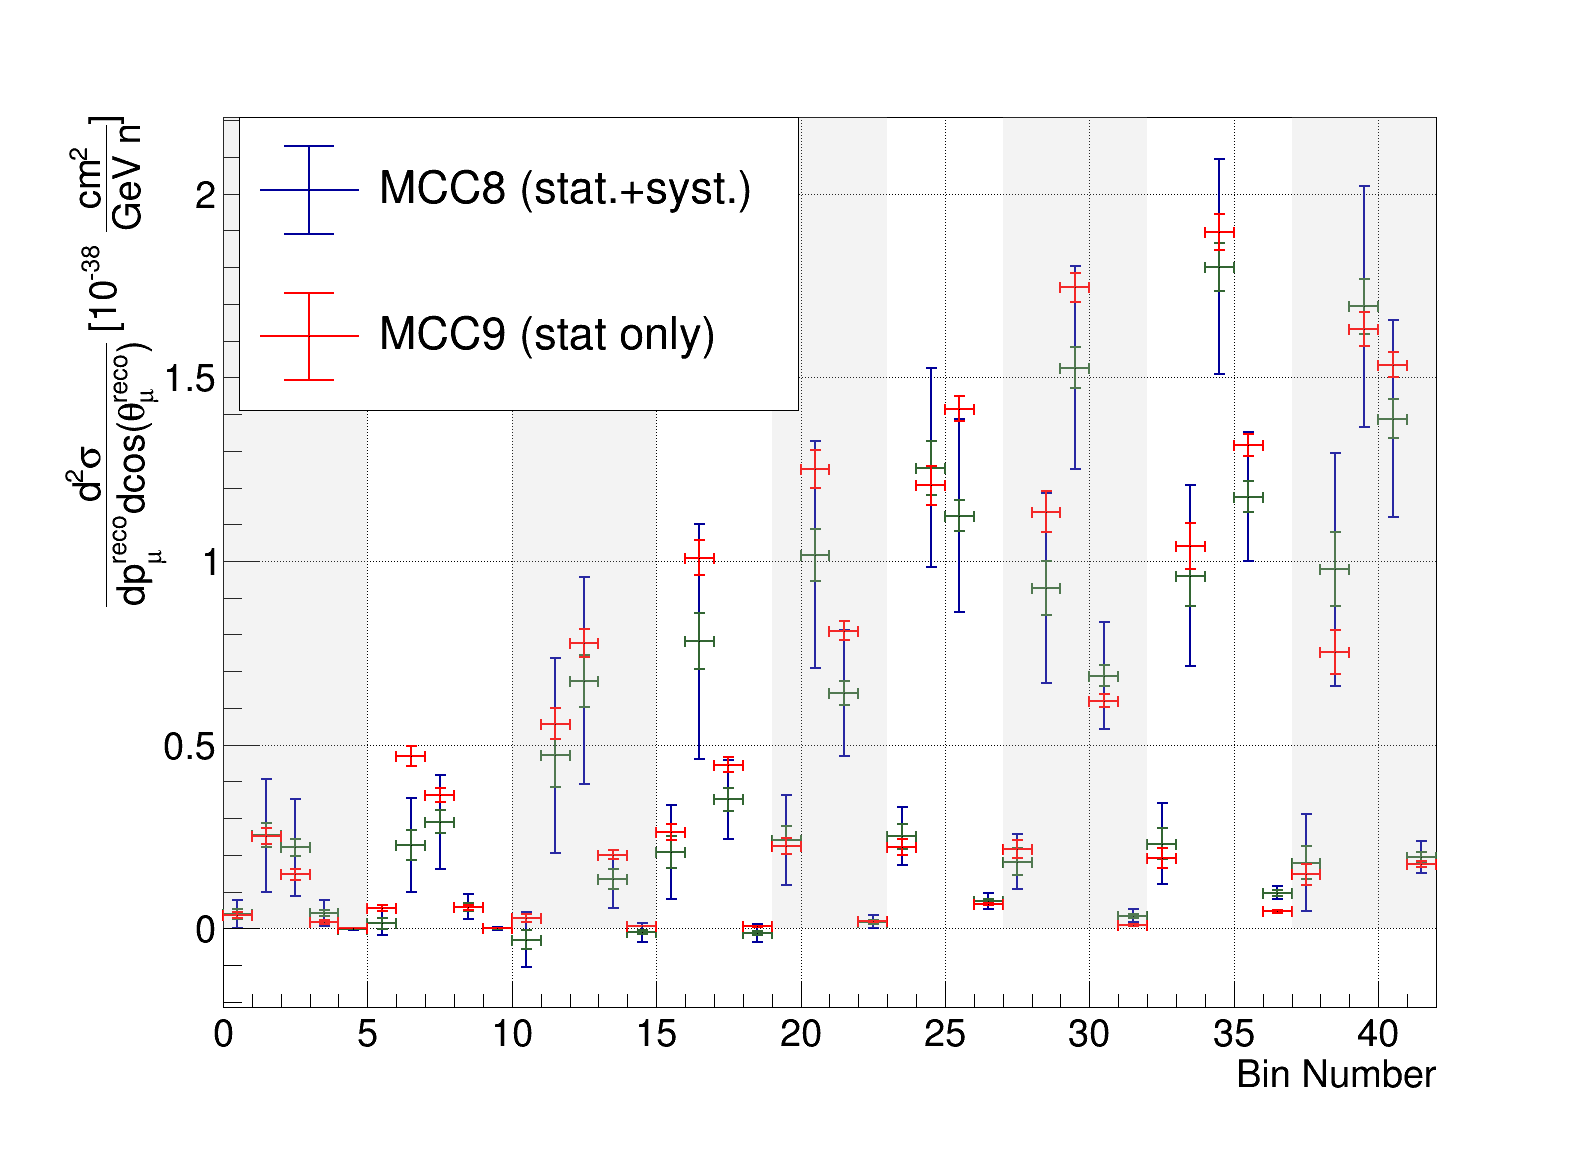

In [15]:
h_err_mcc8.SetLineWidth(2)
h_data_mcc8.SetLineWidth(2)
h_data_mcc9.SetLineWidth(2)
h_err_mcc8.Draw('E1')
h_data_mcc8.SetLineColor(ROOT.kGreen-1)
h_data_mcc8.Draw('E1 same')
h_data_mcc9.SetLineColor(ROOT.kRed)
h_data_mcc9.Draw('E1 same')
h_.Draw('same')


legend = ROOT.TLegend(0.15,0.65,0.5,0.9)
legend.AddEntry(h_err_mcc8,'MCC8 (stat.+syst.)',"lep");
legend.AddEntry(h_data_mcc9,'MCC9 (stat only)',"lep");
legend.Draw()

c1.Draw()
c1.SaveAs(outputdir_png + "h_MCC8_9.png")
c1.SaveAs(outputdir_root + "h_MCC8_9.root")
c1.SaveAs(outputdir_pdf + "h_MCC8_9.pdf")

Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_MCC8_to_9/png/h_MCC8_9_ratio.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_MCC8_to_9/root/h_MCC8_9_ratio.root has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_MCC8_to_9/pdf/h_MCC8_9_ratio.pdf has been created


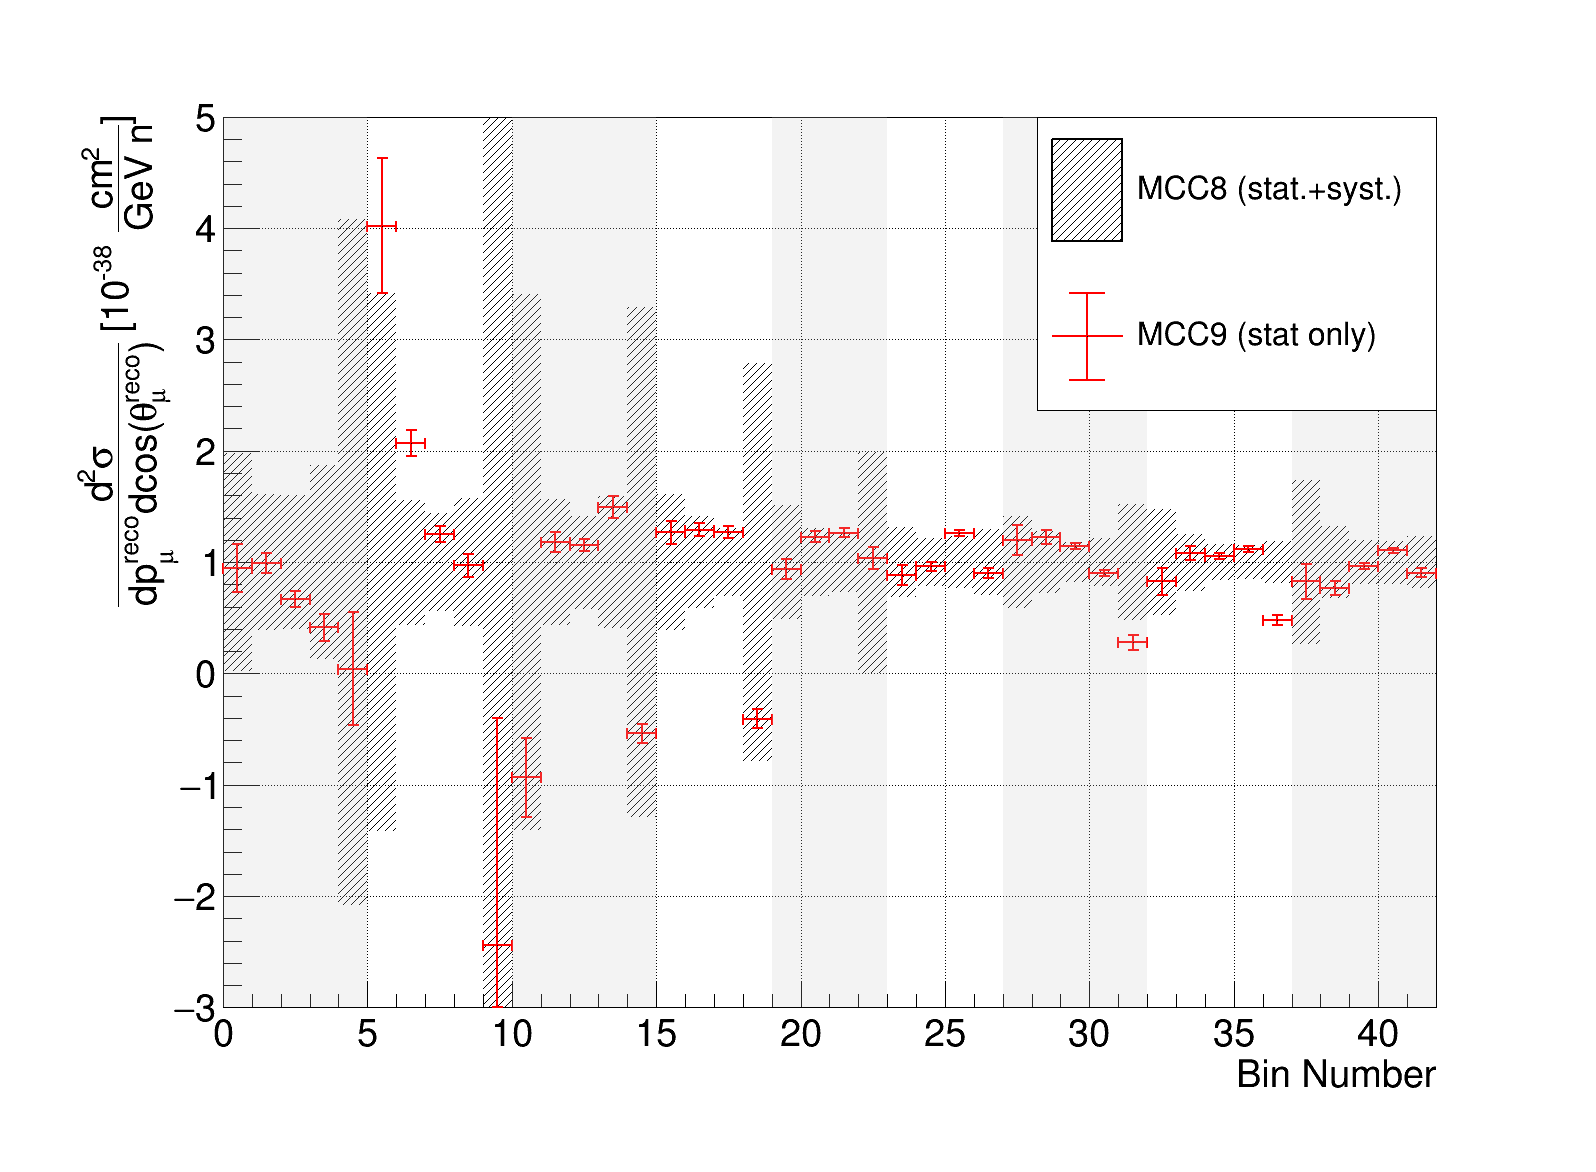

In [16]:
h_err_r = h_err_mcc8.Clone()
h_data_mcc9_r = h_data_mcc9.Clone()

h_tot_noerr = h_err_mcc8.Clone()
for i in range(43):
    h_tot_noerr.SetBinError(i,0)

h_err_r.Divide(h_tot_noerr)
h_data_mcc9_r.Divide(h_tot_noerr)

h_err_r.SetFillColor(ROOT.kBlack)
h_err_r.SetLineColor(ROOT.kBlack)
h_err_r.SetFillStyle(3004)

h_err_r.SetMaximum(5)
h_err_r.SetMinimum(-3)
h_err_r.Draw('E2')
h_data_mcc9_r.SetLineColor(ROOT.kRed)
h_data_mcc9_r.Draw('E1 same')
h_.Draw('same')
h_2 = h_.Clone()
for i in range(43):
    if h_.GetBinContent(i)!=0:
        h_2.SetBinContent(i,-100)
h_2.SetMaximum(10)
h_2.SetMinimum(-100)
h_2.Draw('same')
    
legend = ROOT.TLegend(0.65,0.65,0.9,0.9)
legend.AddEntry(h_err_r,'MCC8 (stat.+syst.)',"f");
legend.AddEntry(h_data_mcc9_r,'MCC9 (stat only)',"lep");
legend.Draw()

c1.Draw()
c1.SaveAs(outputdir_png + "h_MCC8_9_ratio.png")
c1.SaveAs(outputdir_root + "h_MCC8_9_ratio.root")
c1.SaveAs(outputdir_pdf + "h_MCC8_9_ratio.pdf")

In [59]:
import random
print random.random()
#h_data = h_data_mcc9.Clone()
#h_data1 = h_data_mcc9.Clone()
h_data = ROOT.TH1F('h_data','h_data',10,0,10)
h_data1 = ROOT.TH1F('h_data1','h_data1',10,0,10)
h_data2 = ROOT.TH1F('h_data2','h_data2',10,0,10)
h_data3 = ROOT.TH1F('h_data3','h_data3',10,0,10)
#h_covar_test = h_covariance_mcc8.Clone()
h_covar_test = ROOT.TH2F('h_covar_test','h_covar_test',10,0,10,10,0,10)
h_covar_test1 = ROOT.TH2F('h_covar_test1','h_covar_test1',10,0,10,10,0,10)
h_covar_test2 = ROOT.TH2F('h_covar_test2','h_covar_test2',10,0,10,10,0,10)
h_covar_uncorr = ROOT.TH2F('h_covar_test','h_covar_test',10,0,10,10,0,10)
h_frac_test = ROOT.TH2F('h_frac_test','h_frac_test',10,0,10,10,0,10)
h_corr_test = ROOT.TH2F('h_corr_test','h_corr_test',10,0,10,10,0,10)
for i in range(10):
    h_data.SetBinContent(i+1,i+1)
    h_data1.SetBinContent(i+1,(i+1)*1.1+(i+1)*0.1*(random.random()-0.5))
    h_data2.SetBinContent(i+1,(i+1)*1.1+(i+1)*0.1*(random.random()-0.5))
    h_data3.SetBinContent(i+1,(i+1)+(i+1)*0.1*(random.random()-0.5))
for i in range(10):
    for j in range(10):
        h_covar_uncorr.SetBinContent(i+1,j+1,0.0)
        #print (h_data1.GetBinContent(i+1)-h_data.GetBinContent(i+1))*(h_data1.GetBinContent(j+1)-h_data.GetBinContent(j+1))
        h_covar_test.SetBinContent(i+1,j+1,(h_data1.GetBinContent(i+1)-h_data.GetBinContent(i+1))*(h_data1.GetBinContent(j+1)-h_data.GetBinContent(j+1)))
        h_covar_test1.SetBinContent(i+1,j+1,(h_data2.GetBinContent(i+1)-h_data.GetBinContent(i+1))*(h_data2.GetBinContent(j+1)-h_data.GetBinContent(j+1)))
        h_frac_test.SetBinContent(i+1,j+1,h_covar_test.GetBinContent(i+1,j+1)/(h_data.GetBinContent(j+1)*h_data.GetBinContent(i+1)))
h_covar_12 = h_covar_test.Clone()
h_covar_12.Add(h_covar_test1)
for i in range(10):
    h_covar_uncorr.SetBinContent(i+1,i+1,(h_data1.GetBinContent(i+1)-h_data.GetBinContent(i+1))*(h_data1.GetBinContent(i+1)-h_data.GetBinContent(i+1)))
    for j in range(10):
        h_corr_test.SetBinContent(i+1,j+1,h_covar_12.GetBinContent(i+1,j+1)/(math.sqrt(h_covar_12.GetBinContent(j+1,j+1))*math.sqrt(h_covar_12.GetBinContent(i+1,i+1))))


0.501722298937


Warning in <TFile::Append>: Replacing existing TH1: h_data (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h_data1 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h_data2 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h_data3 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h_covar_test (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h_covar_test (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h_covar_test1 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h_covar_test2 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h_covar_test (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h_frac_test (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h_corr_test (Potential memory leak).


0.293613256455


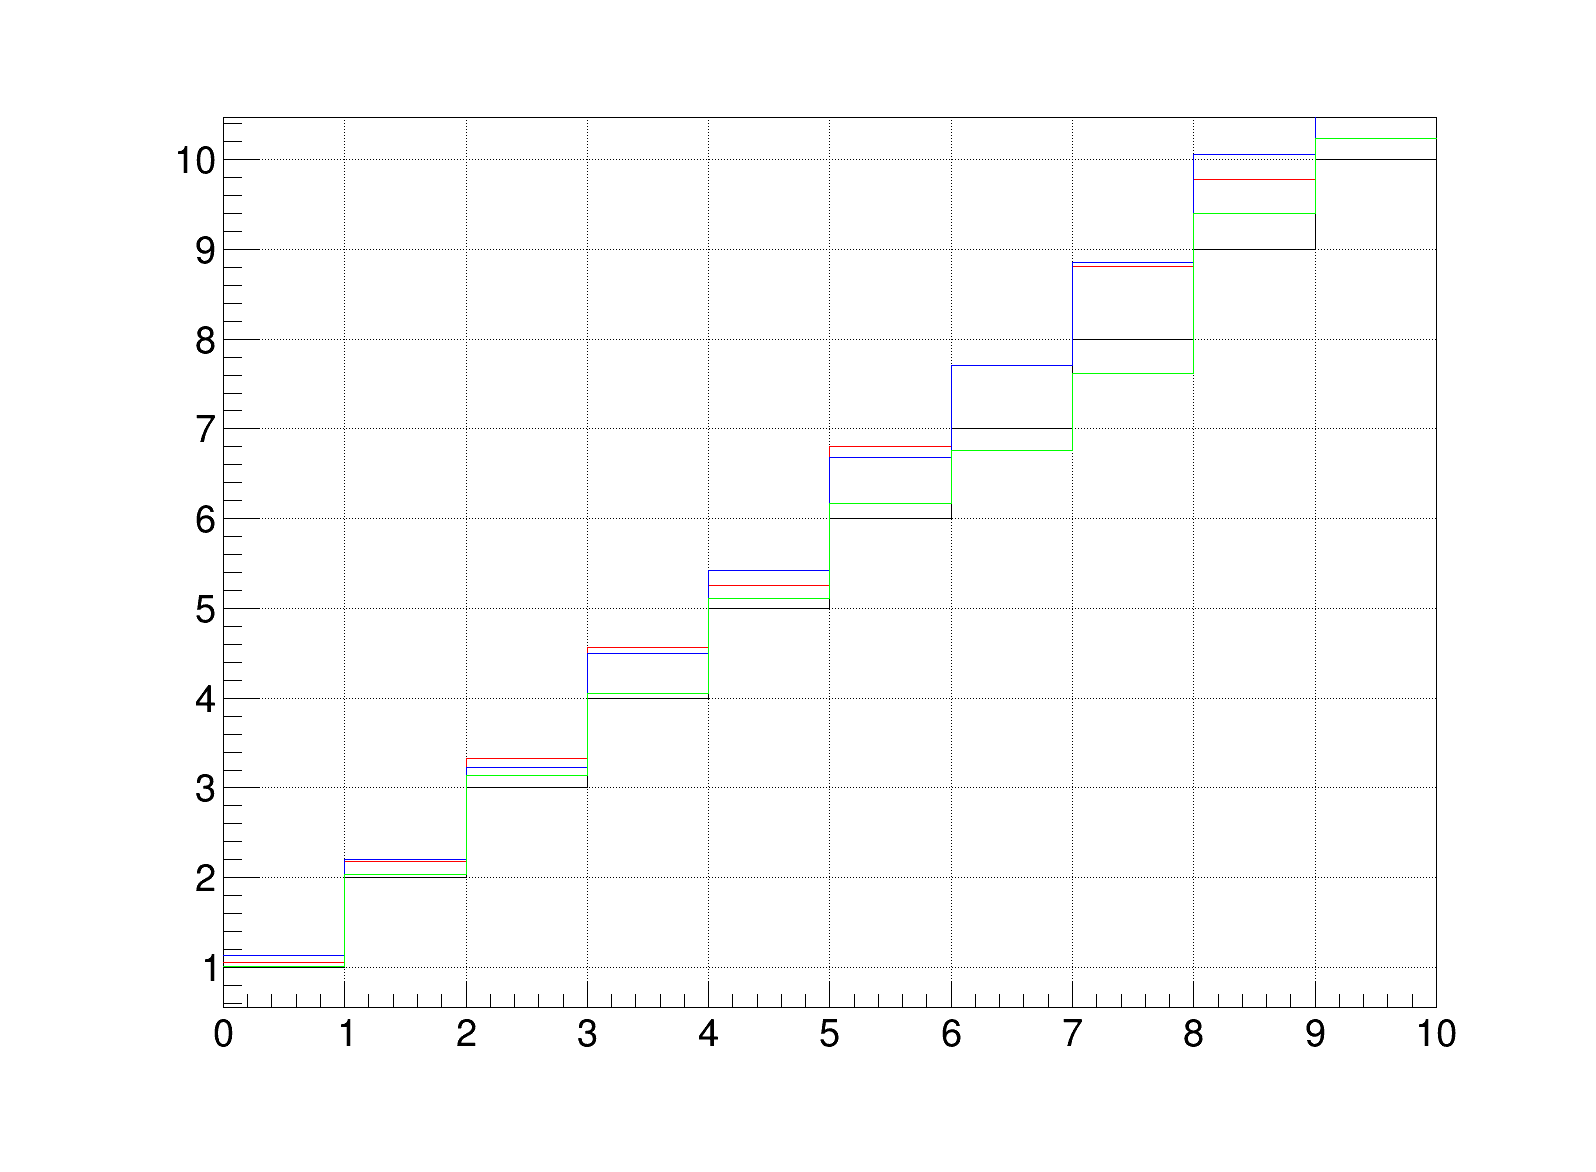

In [60]:
import random
print random.random()
h_data.SetLineColor(ROOT.kBlack)
h_data1.SetLineColor(ROOT.kRed)
h_data2.SetLineColor(ROOT.kBlue)
h_data3.SetLineColor(ROOT.kGreen)
h_data.Draw()
h_data1.Draw('same')
h_data2.Draw('same')
h_data3.Draw('same')
#h_corr_test.Draw('colz text')
#ROOT.gStyle.SetPaintTextFormat('0.3f')
c1.Draw()

1.245217833979796
[1.15813704 1.20611873 1.08145894 1.23494089 1.04626359 1.20131756
 1.1270654  1.01957683 0.98035714 1.1517244 ]


Warning in <TFile::Append>: Replacing existing TH1: h_this1 (Potential memory leak).


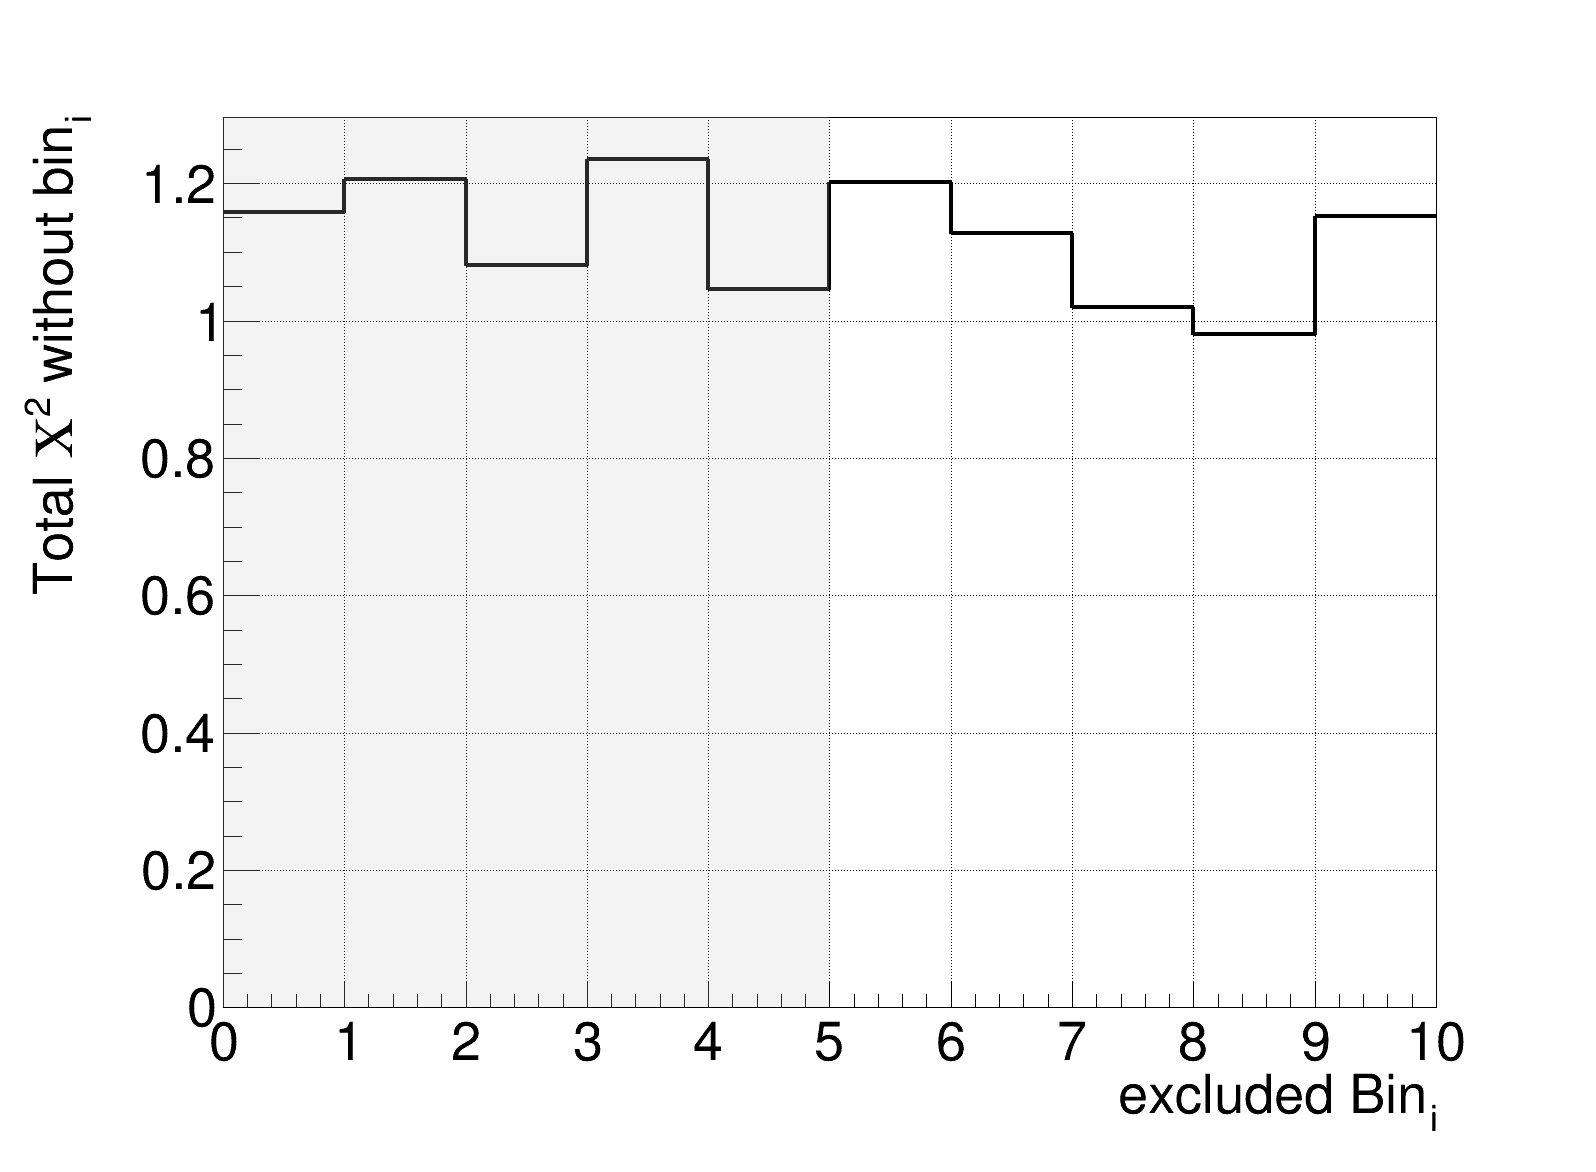

In [61]:
chi2 = my_chi2(h_data,h_data3,h_covar_uncorr)
chi2_nMinus1 = chi2_minus1(h_data,h_data3,h_covar_uncorr)

print chi2
print chi2_nMinus1

h_chiM1 = FF.arr2plot(chi2_nMinus1)
h_chiM1.SetMinimum(0)
h_chiM1.SetYTitle('Total #Chi^{2} without bin_{i}')
h_chiM1.GetYaxis().SetTitleOffset(1.3)
h_chiM1.SetXTitle('excluded Bin_{i}')
h_chiM1.Draw()
h_ = FF.histBkg(h_chiM1)
h_.Draw('same')
c1.Draw()


-2432841.037858397
[11511960.41895794  4255217.28246815  5012275.31363399 -2439656.88926087
  3201857.36598123 18211301.61995775 -3661544.61745914   270770.11069988
 -2553564.22086304  1113801.86468115]


Warning in <TFile::Append>: Replacing existing TH1: h_this1 (Potential memory leak).


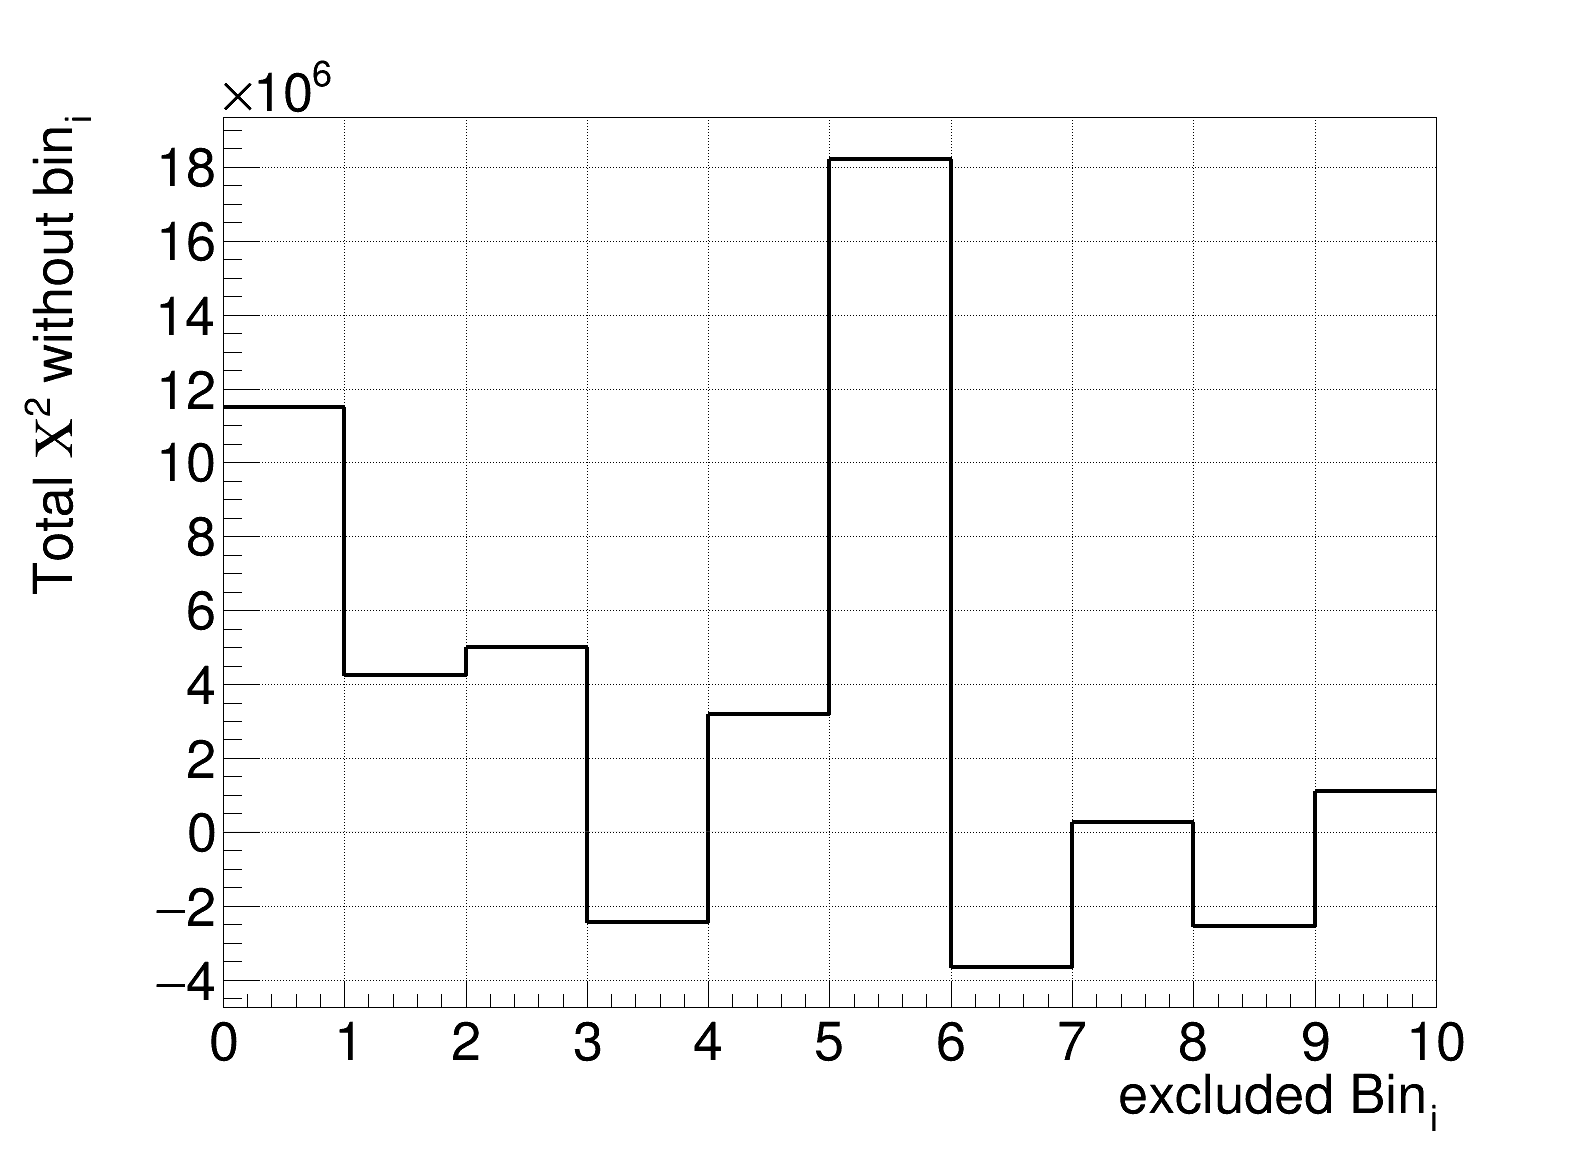

In [65]:
chi2 = my_chi2(h_data,h_data3,h_covar_12)
chi2_nMinus1 = chi2_minus1(h_data,h_data3,h_covar_12)

print chi2
print chi2_nMinus1

h_chiM1 = FF.arr2plot(chi2_nMinus1)
#h_chiM1.SetMinimum(0)
h_chiM1.SetYTitle('Total #Chi^{2} without bin_{i}')
h_chiM1.GetYaxis().SetTitleOffset(1.3)
h_chiM1.SetXTitle('excluded Bin_{i}')
h_chiM1.Draw()
h_ = FF.histBkg(h_chiM1)
h_.Draw('same')
c1.Draw()


In [21]:
def my_chi2(h_data1, h_data2, h_covar):
    data1_vec = FF.plot2arr(h_data1,1)
    data2_vec = FF.plot2arr(h_data2,1)
    covar = FF.plot2arr(h_covar,2)    
    inv_covar = np.linalg.inv(covar)
    chi_vec = 0
    for i in range(10):
        for j in range(10):
            chi2_tmp = (data1_vec[i]-data2_vec[i])*inv_covar[i][j]*(data1_vec[j]-data2_vec[j])
            chi_vec +=chi2_tmp
    return chi_vec


In [63]:
def chi2_minus1(h_data1, h_data2, h_covar):
    data_vec = FF.plot2arr(h_data1,1)
    pred_vec = FF.plot2arr(h_data2,1)
    covar_h = FF.plot2arr(h_covar,2)
    
    covar = np.zeros((10,10-1,10-1))
    dat_pred = np.zeros((10,10-1))
    #print data_vec
    #print pred_vec
    for z in range(10):
        i_c = 0
        for i in range(10):
            j_c = 0
            if i != z :
                dat_pred[z][i_c] = data_vec[i]-pred_vec[i]
                for j in range(10):
                    if j!=z:
                        #print i_c,j_c,covar_h[i][j]
                        covar[z][i_c][j_c] = covar_h[i][j]
                        j_c+=1
                i_c+=1
    #inv_covar = np.linalg.inv(covar)
    chi_vec = np.zeros((10))
    for z in range(10):
        #print covar[z]
        inv_covar = np.linalg.inv(covar[z])
        chi_vec[z] = (dat_pred[z]).dot(inv_covar.dot(dat_pred[z]))

    return chi_vec